# Classification with support vector machines

We consider performing classification of MNIST digits using SVM, first for binary classification, then for multiclass classification. The reference page on scikit-learn for SVM is https://scikit-learn.org/stable/modules/svm.html (which you are encouraged to read!).

**There are 10 questions to answer. Questions 5 to 8 can be skipped if the other questions are too time consuming.** 

In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# set up the random number generator: given seed for reproducibility, None otherwise
# (see https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng)
my_seed = 1
rng = np.random.default_rng(seed=my_seed) 

# Construction of the dataset 

We use the MNIST dataset already encountered in various hands-on sessions (kNN and PCA for instance). 

In [2]:
# load data from Keras, values between 0 and 255 initially
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print('initial data type for images = ',x_train.dtype,', initial data shape = ',x_train.shape)
print('initial data type for labels = ',y_train.dtype,', initial label shape = ',y_train.shape,'\n')
    
# renormalize to have data between 0 and 1; could alternatively use built-in rescaling function
# such as https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
x_train = x_train/255. 
x_test = x_test/255.
print('Train set: data set size =',x_train.shape[0])
print('Test set:  data set size =',x_test.shape[0])

# reshape the data points, which are 28x28 tensors, into a single vector of size 28x28=784
x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))

initial data type for images =  uint8 , initial data shape =  (60000, 28, 28)
initial data type for labels =  uint8 , initial label shape =  (60000,) 

Train set: data set size = 60000
Test set:  data set size = 10000


We can plot the first elements of the resulting data set in order to see what they looks like, in particular when binarization is performed.

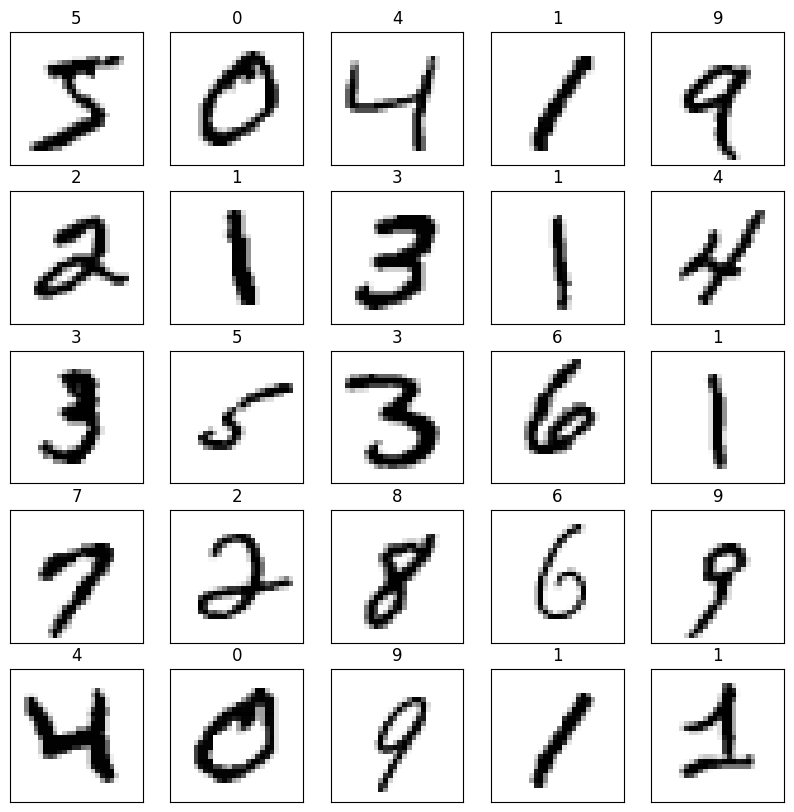

In [3]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # color map = binary, other choices here https://matplotlib.org/stable/tutorials/colors/colormaps.html
    plt.imshow(x_train[i].reshape(28,28), cmap=plt.cm.binary)     
    plt.title(y_train[i])
plt.show()

## Part 1 - Classifying datasets of two digits only

We start by a binary classification problem, for a dataset obtained by extracting images corresponding to two given digit values. The suggested digits are 0 and 8 since they can be visually quite similar.

### Creating a dataset of two digits only

We use the same routine as the one used for logistic regression.

In [4]:
digit_1 = 8
digit_2 = 0

# for train data
indices_two_digits_train = np.where((y_train == digit_1)|(y_train == digit_2))
x_train_two_digits, y_train_two_digits = x_train[indices_two_digits_train], y_train[indices_two_digits_train]
print('Shape of train data: ',x_train_two_digits.shape)
print('Shape of train labels:',y_train_two_digits.shape)

# same for test
indices_two_digits_test = np.where((y_test == digit_1)|(y_test == digit_2))
x_test_two_digits, y_test_two_digits = x_test[indices_two_digits_test], y_test[indices_two_digits_test]
print('Shape of test data: ',x_test_two_digits.shape)
print('Shape of test labels:',y_test_two_digits.shape)

Shape of train data:  (11774, 784)
Shape of train labels: (11774,)
Shape of test data:  (1954, 784)
Shape of test labels: (1954,)


### Training SVM on this database

The parameter C is in factor of the penalty term arising from misclassification. A large value of C aims at classifying all training examples correctly. Various kernels can be used: "linear" (default choice), "rbf" (Gaussians), "poly" (polynomials), "sigmoid". Custom kernels could also be defined.

In [5]:
from sklearn import svm
from sklearn.metrics import accuracy_score

We start by using SVM with some parameters set to default values.

**Question 1.** What are the default values for $C$ and for the kernel?

C is **1** by default and the default value for the kernel is **'rbf'**, ie Radial Basis Function.

In [6]:
binary_classifier = svm.SVC()
C_values = np.logspace(-1, 4, 6)

train_accuracy = []
test_accuracy = []

for C_chosen in C_values:
    # construct the classifier with given value of C and fit it
    binary_classifier = svm.SVC(C=C_chosen)
    binary_classifier.fit(x_train_two_digits,y_train_two_digits)
    # compute the training error for the 0-1 loss
    y_pred_two_digits = binary_classifier.predict(x_train_two_digits)
    train_score = accuracy_score(y_true=y_train_two_digits, y_pred=y_pred_two_digits)
    train_accuracy.append(train_score)
    # compute the validation error for the 0-1 loss
    y_pred_two_digits = binary_classifier.predict(x_test[indices_two_digits_test])
    y_true_two_digits = y_test[indices_two_digits_test]
    test_score = accuracy_score(y_true=y_true_two_digits, y_pred=y_pred_two_digits)
    test_accuracy.append(test_score)
    print('C =',C_chosen,': test accuracy =',test_score)

C = 0.1 : test accuracy = 0.9923234390992836
C = 1.0 : test accuracy = 0.9948822927328557
C = 10.0 : test accuracy = 0.9948822927328557
C = 100.0 : test accuracy = 0.9948822927328557
C = 1000.0 : test accuracy = 0.9948822927328557
C = 10000.0 : test accuracy = 0.9948822927328557


We can plot the test accuracy as a function of the value of $C$ (at this stage we are not choosing the value of $C$, as this would require performing some cross validation with the training set).

C:\Users\alice\AppData\Local\Temp\ipykernel_34876\3898351849.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-gD" (-> color='g'). The keyword argument will take precedence.
  plt.semilogx(C_values, train_accuracy,'-gD' ,color='red' , label="Train accuracy")


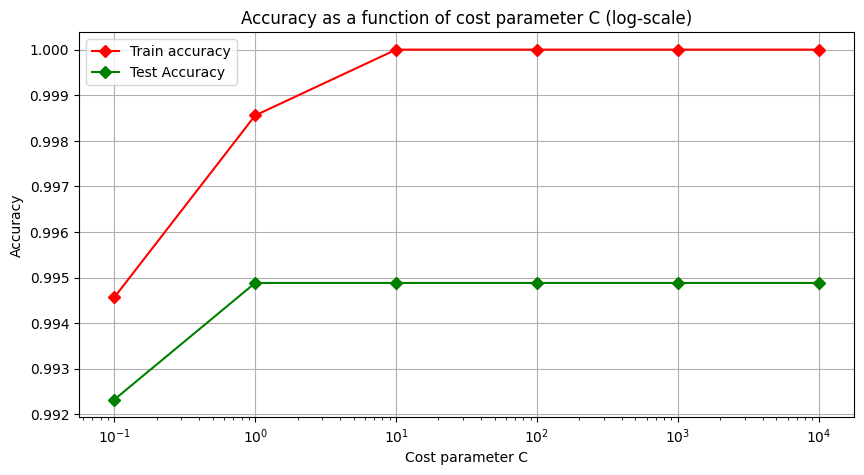

In [7]:
plt.figure(figsize=(10, 5))
plt.semilogx(C_values, train_accuracy,'-gD' ,color='red' , label="Train accuracy")
plt.semilogx(C_values, test_accuracy,'-gD' , label="Test Accuracy")
plt.grid(True)
plt.xlabel("Cost parameter C")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Accuracy as a function of cost parameter C (log-scale)')
plt.show()

### Understanding and visualizing what SVM does

We also have a closer look at the outputs for a given value of $C$, in particular the various coefficients, in order to understand the decision function. We consider the case of a linear kernel, which leads to more interpretable results.

In [8]:
binary_classifier = svm.SVC(C=10,kernel="linear")
binary_classifier.fit(x_train_two_digits,y_train_two_digits)

SVC(C=10, kernel='linear')

**Question 2.** Complete the code below to plot the confusion matrix and report the accuracy on the test set for the parameters above. What is the fraction of *digit_1* classified as *digit_2*?

In [18]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# computing the accuracy
indices_two_digits_test = np.where((y_test == digit_1)|(y_test == digit_2))
y_pred_two_digits = binary_classifier.predict(x_test[indices_two_digits_test])
y_true_two_digits = y_test[indices_two_digits_test]
print("Accuracy:", metrics.accuracy_score(y_true=y_true_two_digits, y_pred=y_pred_two_digits), "\n")

# computing the confusion matrix
# see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
conf_mat = confusion_matrix(y_true_two_digits, y_pred_two_digits)
print("Confusion matrix\n",conf_mat,"\n")

# fraction of digit_1 misclassified as digit_2
fraction = conf_mat[0][1]/(sum(conf_mat[0]))
print("Fraction of",digit_1,"misclassified as",digit_2,":",fraction)

Accuracy: 0.9902763561924258 

Confusion matrix
 [[972   8]
 [ 11 963]] 

Fraction of 8 misclassified as 0 : 0.00816326530612245


We next plot the weights in the shape of an image, to better visualize which pixels count more.

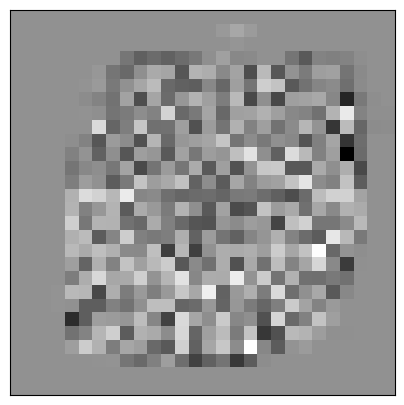

In [19]:
weights = binary_classifier.coef_
b = binary_classifier.intercept_
plt.figure(figsize=(5, 5))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(weights.reshape(28,28), cmap=plt.cm.binary)
plt.show()

We next have a closer look at the values of the decision function.

**Question 3.** Complete the code below to plot the histograms of the values of the decision function for each subcategory of points.

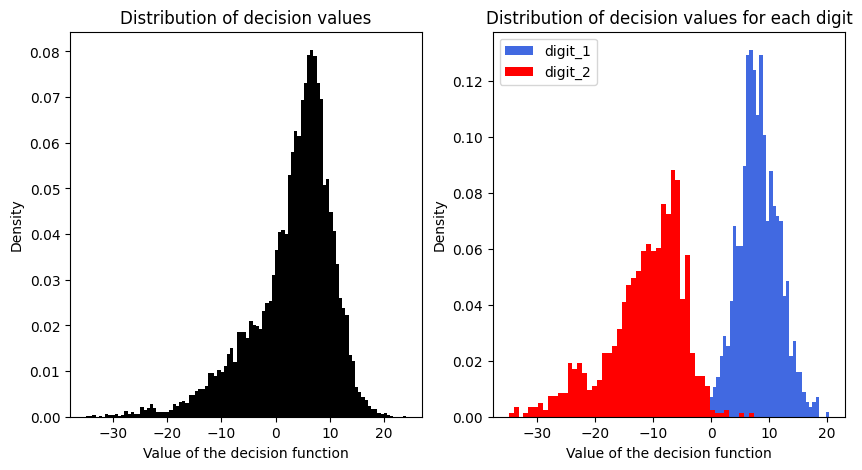

In [27]:
decision_pred_test = binary_classifier.decision_function(x_test)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
# we first plot the values of the decision function for all data points
# can check that decision_pred_test[i] = np.dot(weights,x_test[i])+b
plt.hist(decision_pred_test,bins=100,color='black',density=True)
plt.xlabel("Value of the decision function")
plt.ylabel("Density")
plt.title('Distribution of decision values')
# we next look at the values for the images corresponding to digit_1 and digit_2, respectively
decision_pred_test_1 = decision_pred_test[y_test == digit_1]
decision_pred_test_2 = decision_pred_test[y_test == digit_2]
plt.subplot(1, 2, 2)
plt.hist(decision_pred_test_1,bins=50,color='royalblue',density=True)
plt.hist(decision_pred_test_2,bins=50,color='red',density=True)
plt.xlabel("Value of the decision function")
plt.ylabel("Density")
plt.legend(['digit_1','digit_2'])
plt.title('Distribution of decision values for each digit')
plt.show()

We next investigate the support vectors.

**Question 4.** Complete the code below to identify the support vector and plot some of them. Use the attributes *support_vectors_* of the SVC class https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Number of support vectors for each class:
 - for 8 : 134
 - for 0 : 161 

Some support vectors


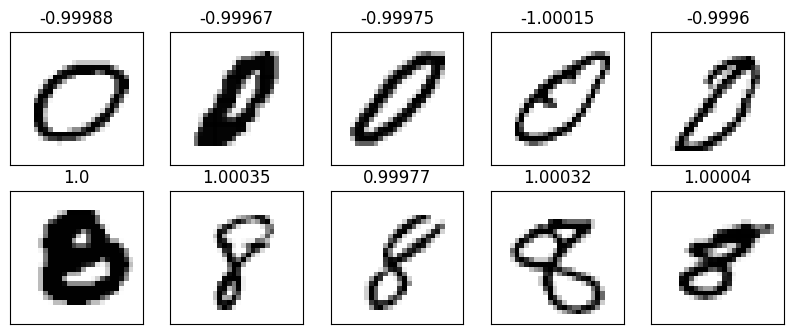

In [33]:
print('Number of support vectors for each class:')
print(' - for', digit_1, ':', binary_classifier.n_support_[0])
print(' - for', digit_2, ':', binary_classifier.n_support_[1], '\n')
indices = binary_classifier.support_  # (indices of the support vectors)
decision_values = binary_classifier.decision_function(binary_classifier.support_vectors_) # (values of the decision function for the support vectors)
print('Some support vectors')
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(binary_classifier.support_vectors_[i].reshape(28,28), cmap=plt.cm.binary)
    plt.title(round(decision_values[i],5))
    plt.subplot(5, 5, i+6)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(binary_classifier.support_vectors_[-i-1].reshape(28,28), cmap=plt.cm.binary)
    plt.title(round(decision_values[-i-1],5))
plt.show()

### Performing SVM after a PCA

We next perform a PCA, to reduce the dimensionality of the inputs to two variables, and then perform SVM in this reduced space. We do this for pedagogical reasons, to allow for a better visualization of the results, as this degrades the accuracy of the prediction. One can however increase the number of retained PCA dimensions until the accuracy on the predictions is nearly as good as with the full features.

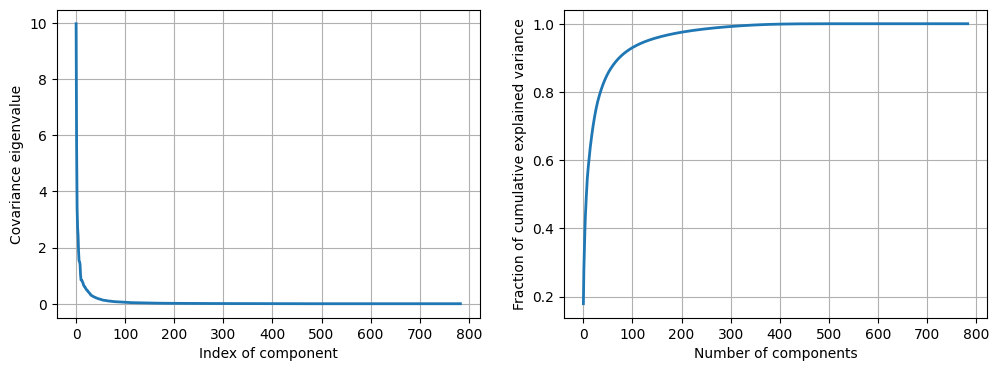

In [34]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 784
pca_data = pca.fit_transform(x_train_two_digits)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)
# Plot the PCA spectrum
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 4))
ax1.plot(pca.explained_variance_, linewidth=2)
ax1.grid()
ax1.set_xlabel('Index of component')
ax1.set_ylabel('Covariance eigenvalue')
ax2.plot(cum_var_explained, linewidth=2)
ax2.grid()
ax2.set_xlabel('Number of components')
ax2.set_ylabel('Fraction of cumulative explained variance')
plt.show()

**Question 5 (not priority).** Compute the fraction of variance explained by the first two principal components.

In [36]:
fraction = np.sum(pca.explained_variance_ratio_[:2])
fraction

0.2803769953164784

We transform images of both digits into 2 dimensional vectors for plotting, by keeping some PCA components. 

**Question 6 (not priority).** Compute the scores of the test images on the first two principal components, and perform the scatter plot of these scores.  

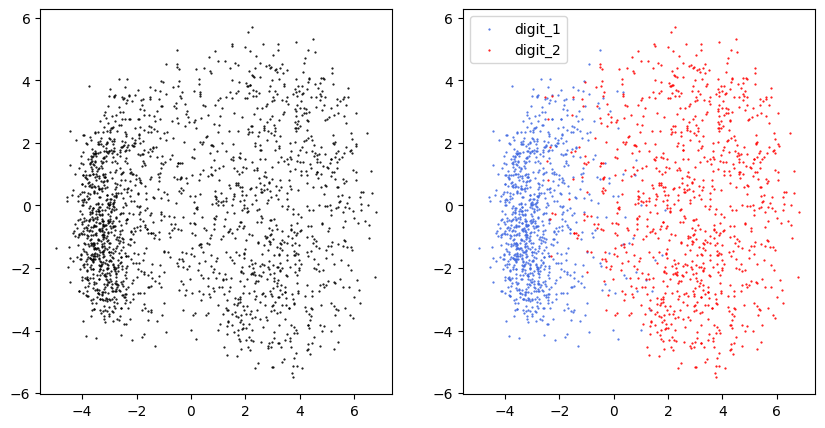

In [37]:
# indices of PCA components to plot
pca.n_components = 2
component_1 = 0
component_2 = 1

pca.fit(x_train_two_digits)
score_train = pca.transform(x_train_two_digits) 
score_test = pca.transform(x_test_two_digits) 

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(score_test[:,component_1],score_test[:,component_2],s=0.3,color='black')
plt.subplot(1, 2, 2)
score_test_digit_1 = score_test[y_test_two_digits == digit_1]
score_test_digit_2 = score_test[y_test_two_digits == digit_2]
plt.scatter(score_test_digit_1[:,component_1],score_test_digit_1[:,component_2],s=0.3,color='royalblue')
plt.scatter(score_test_digit_2[:,component_1],score_test_digit_2[:,component_2],s=0.3,color='red')
plt.legend(['digit_1','digit_2'])
plt.show()

It seems almost possible to linearly separate the data points as such, so we try SVM. One can test the quality of the results depending on the chosen kernel.

**Question 7 (not priority).** Which kernel gives the best performance for $C=10$ after reducing to two principal components? How does the performance compare to the situation where no PCA is performed?

In [41]:
for kernel in ['linear','poly','rbf','sigmoid']:
    binary_classifier_PCA = svm.SVC(C=10,kernel=kernel)
    binary_classifier_PCA.fit(score_train,y_train_two_digits)
    y_train_PCA = binary_classifier_PCA.predict(score_train)
    y_test_PCA = binary_classifier_PCA.predict(score_test)
    print("kernel :", binary_classifier_PCA.kernel)
    print("accuracy (on train data):", metrics.accuracy_score(y_true=y_train_two_digits,y_pred=y_train_PCA))
    print("accuracy (on test data) :", metrics.accuracy_score(y_true=y_test_two_digits,y_pred=y_test_PCA), "\n")

print("No PCA")
print("Accuracy:", metrics.accuracy_score(y_true=y_true_two_digits, y_pred=y_pred_two_digits), "\n")

kernel : linear
accuracy (on train data): 0.952012909801257
accuracy (on test data) : 0.9534288638689867 

kernel : poly
accuracy (on train data): 0.9464922711058263
accuracy (on test data) : 0.9472876151484135 

kernel : rbf
accuracy (on train data): 0.95269237302531
accuracy (on test data) : 0.9559877175025588 

kernel : sigmoid
accuracy (on train data): 0.9079327331408188
accuracy (on test data) : 0.9104401228249744 

No PCA
Accuracy: 0.9902763561924258 



rbf and linear give very similar results, with an accuracy of about 95%, poly is slightly less good, sigmoid is significantly worse. When no PCA is performed, the test accuracy is much better, above 99%.

**Question 8 (not priority).** For the classifier with the linear kernel, plot the level sets of the decision function for the values -1,0 and 1 (use the attributes of the classifier).

In [44]:
binary_classifier_PCA = svm.SVC(C=10,kernel='linear')
binary_classifier_PCA.fit(score_train,y_train_two_digits)
y_train_PCA = binary_classifier_PCA.predict(score_train)
y_test_PCA = binary_classifier_PCA.predict(score_test)

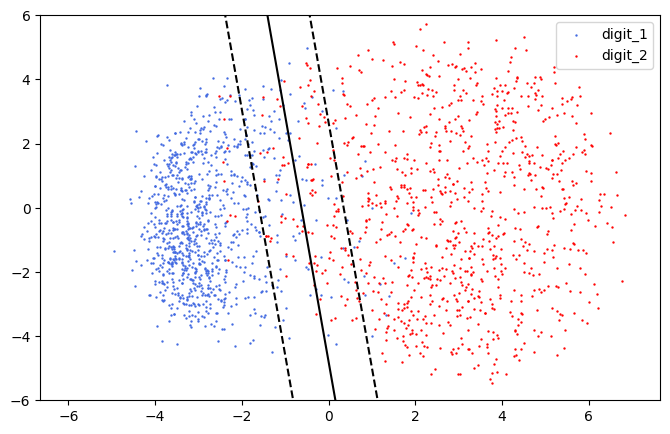

In [45]:
#-- plot first the scatter plot of the data set (re-use what has been done above) --
plt.figure(figsize=(8, 5))
score_test_digit_1 = score_test[y_test_two_digits == digit_1]
score_test_digit_2 = score_test[y_test_two_digits == digit_2]
plt.scatter(score_test_digit_1[:,component_1],score_test_digit_1[:,component_2],s=0.5,color='royalblue')
plt.scatter(score_test_digit_2[:,component_1],score_test_digit_2[:,component_2],s=0.5,color='red')
plt.legend(['digit_1','digit_2'])
#-- plot next the required isolines --
w = binary_classifier_PCA.coef_
b = binary_classifier_PCA.intercept_
# isoline 0 of the decision function
x1 = np.linspace(-6,7,20)
x2 = (-w[0,0]*x1 - b[0]) / w[0,1]
plt.plot(x1,x2,color='black')
# isoline -1 of the decision function
x2 = (-w[0,0]*x1 - b[0] + 1) / w[0,1]
plt.plot(x1,x2,color='black',linestyle='dashed')
# isoline 1 of the decision function
x2 = (-w[0,0]*x1 - b[0] - 1) / w[0,1]
plt.plot(x1,x2,color='black',linestyle='dashed')
plt.ylim((-6,6))
plt.show()

## Part 2 - Multiclass SVM

We now turn to classification for all digits; see Section 1.4.1.1 in https://scikit-learn.org/stable/modules/svm.html
The training is now more intensive, and can take several minutes -- which is why we subsample the dataset in order to allow for a faster training.

In [46]:
subsampling_rate = 10
# start:sto:step 
x_train_subsampled = x_train[0::10]
y_train_subsampled = y_train[0::10]
print('Initial dimension of the data:',x_train.shape)
print('After subsampling at rate',subsampling_rate,':',x_train_subsampled.shape)

Initial dimension of the data: (60000, 784)
After subsampling at rate 10 : (6000, 784)


In [47]:
multi_classifier = svm.SVC(C=10,kernel="linear")
multi_classifier.fit(x_train_subsampled,y_train_subsampled)

SVC(C=10, kernel='linear')

**Question 9.** Which strategy is used for classification: one-vs-all or one-vs-one?

By default, SVC uses a one-vs-all ('ovr') decision function. However, note that internally, one-vs-one (‘ovo’) is always used as a multi-class strategy to train models.

In [48]:
y_pred = multi_classifier.predict(x_test)
y_true = y_test
print("accuracy:", metrics.accuracy_score(y_true, y_pred), "\n")
print(metrics.confusion_matrix(y_true, y_pred))

accuracy: 0.9013 

[[ 950    0    5    2    3   10    5    1    3    1]
 [   0 1106   11    3    1    2    2    3    7    0]
 [  13   10  940   14   16    3   11   11   11    3]
 [   5    3   43  886    1   23    3    8   28   10]
 [   0    2   14    4  916    1    6    4    1   34]
 [  15   13   23   37   17  746   15    2   21    3]
 [  13    4   16    1   10    6  905    1    2    0]
 [   1   14   23   14   24    1    0  898    2   51]
 [  15    8   17   20   16   38   15   12  829    4]
 [   7    8    1    4   79   16    0   40   17  837]]


We can look at misclassified digits.

**Question 10.** Complete the code below to find misclassified digits to plot them. 

Example of 2 classified as 5


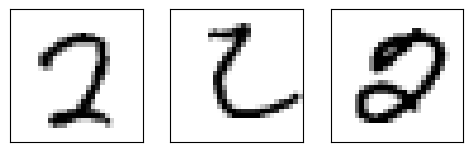

In [51]:
true_digit = 2
prediction_digit = 5
misclassification_indices = np.where((y_true == true_digit) & (y_pred == prediction_digit))
misclassified_images = x_test[misclassification_indices]
if (misclassified_images.shape[0] == 0):
    print('No',true_digit,'classified as',prediction_digit)
else:
    print('Example of',true_digit,'classified as',prediction_digit)
    plt.figure(figsize=(10, 10))
    for i in range(min(5,misclassified_images.shape[0])):
       plt.subplot(5, 5, i+1)
       plt.xticks([])
       plt.yticks([])
       plt.grid(False)
       plt.imshow(misclassified_images[i].reshape(28,28), cmap=plt.cm.binary)
    plt.show()

**Question 11.** Test various kernels and values of $C$. What is the best prediction error you can achieve?

In [54]:
best_error = float('inf')
best_kernel = ''
best_C = 0
y_true_best = []
y_pred_best = []

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    for C in [1, 10, 100]:
        multi_classifier = svm.SVC(C=C, kernel=kernel)
        multi_classifier.fit(x_train_subsampled, y_train_subsampled)
        y_pred = multi_classifier.predict(x_test)
        y_true = y_test
        error = 1 - metrics.accuracy_score(y_true, y_pred)
        
        if error < best_error:
            best_error = error
            best_kernel = kernel
            best_C = C
            y_true_best = y_true
            y_pred_best = y_pred

print("Best prediction error:", best_error)
print("Best kernel:", best_kernel)
print("Best C:", best_C)

print("accuracy:", metrics.accuracy_score(y_true_best, y_pred_best), "\n")
print(metrics.confusion_matrix(y_true_best, y_pred_best))

Best prediction error: 0.041000000000000036
Best kernel: rbf
Best C: 100
accuracy: 0.959 

[[ 970    0    2    0    1    2    2    1    2    0]
 [   0 1120    3    1    0    1    3    1    5    1]
 [   9    1  988    3    9    1    3   11    6    1]
 [   0    1   21  953    1    6    0    7   15    6]
 [   1    1    3    0  959    0    4    3    1   10]
 [   7    4   12   11   10  827   12    1    5    3]
 [   7    3    2    0    8    4  933    0    1    0]
 [   0    9   12    2   10    1    0  980    1   13]
 [   4    3    9    4    9   10    6    7  921    1]
 [   5    5    0    5   32    9    1    6    7  939]]


The prediction we can achieve is 0.0041 with the kernel 'rbf' and C = 100. This gives us an accuracy of 0.959.

## Part 3 - Extensions for final project

Here is a list of possible extensions:
- implement cross validation using *GridSearchCV* (see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html);
- plot learning curves (test and train losses as a function of the sample size);
- recognizing your own written digits: see https://towardsdatascience.com/support-vector-machine-mnist-digit-classification-with-python-including-my-hand-written-digits-83d6eca7004a to write your own numbers and have them classified! In essence, produce an image with some software, and then resize it using (under Linux) *convert -resize 28X28! sample_image0.png sample_image0_r.png* This should produce a quite small image at a low resolution. Start by checking the image and converting it to a 28 x 28 numpy array.